In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Functions

In [3]:
def load_img_to_array(directory, fname, format='.jpeg'):
    file_path = os.path.join(directory, fname + format)

    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    rows,cols = image.shape

    image_array = []

    for i in range(rows):
        row = []
        for j in range(cols):
            k = image[i,j]
            row.append(k)
        image_array.append(row)

    image_array = np.array(image_array)

    return image_array

def dist_img_array(target, reference):
    difference = target - reference
    distance = np.linalg.norm(difference)
    return distance

# function below is not ready yet
def serial_distance_finder(ref_dir, ref_fname, data_dir, id_file):
    dist_list = []

    # pick reference from reference folder
    ref_array = load_img_to_array(ref_dir, ref_fname)

    # loop through all files in data_dir with the id_file string at the start
    for filename in os.listdir(data_dir):
        # calculate distance from reference
        if filename.startswith(id_file):
            print(filename)
            target_array = load_img_to_array(data_dir, filename)

            difference = target_array - ref_array
            distance = np.linalg.norm(difference)
            dist_list.append(distance)
    
    return dist_list

# Test case

In [3]:
# test on a single image from 64% w/w folder

reference_directory = 'Reference'
reference_fname = 'Light'

refarr = load_img_to_array(reference_directory, reference_fname)

directory = 'Data_64'
fname = 'light1'

testarr = load_img_to_array(directory, fname)

diff_val = dist_img_array(testarr, refarr)
print(diff_val)

1019027.4751973079


# Start of differencing code

In [4]:
reference_directory = 'Reference'
reference_fname = 'Light'

ref_img = load_img_to_array(reference_directory, reference_fname)
#ref_array = ref_img[1600:2420, 2342:2882]
ref_array = ref_img[1700:2200, 2410:2820]

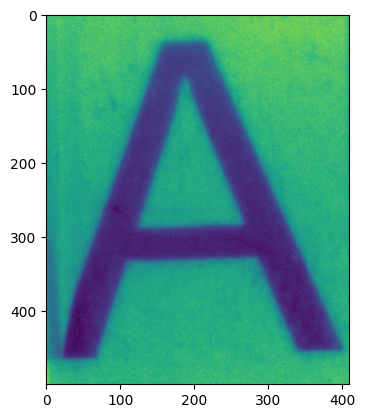

In [7]:
plt.imshow(ref_array)

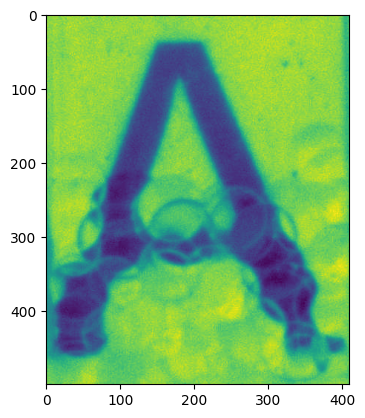

In [14]:
directory = 'Data_53'
fname = 'light4'

test_img = load_img_to_array(directory, fname)

#test_arr = test_img[1600:2420, 2342:2882]
test_arr = test_img[1700:2200, 2410:2820]
plt.imshow(test_arr)

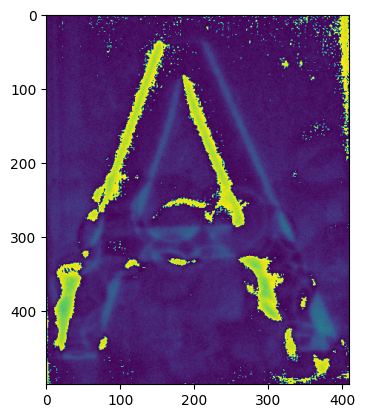

In [15]:
plt.imshow(test_arr - ref_array)

In [62]:
conc_dist_list = []
dir_list = ['Data_53','Data_53.5','Data_54','Data_54.5','Data_55','Data_55.5','Data_56',
            'Data_56.5','Data_57','Data_57.5','Data_58','Data_58.5', 'Data_59','Data_59.5',
            'Data_60','Data_60.5','Data_61','Data_61.5','Data_62','Data_62.5','Data_63','Data_63.5','Data_64']

for directory in dir_list:
    dist_list = []
    for i in range(5):
        fname = 'dark' + str(i+1)

        target_img = load_img_to_array(directory, fname)
        #target_array = target_img[1600:2420, 2342:2882]
        target_array = target_img[1700:2200, 2410:2820]

        diff_val = dist_img_array(target_array, ref_array)
        dist_list.append(diff_val)
    conc_dist_list.append(dist_list)

Text(0.5, 1.0, 'Image difference vs w/w concentration for dark dataset')

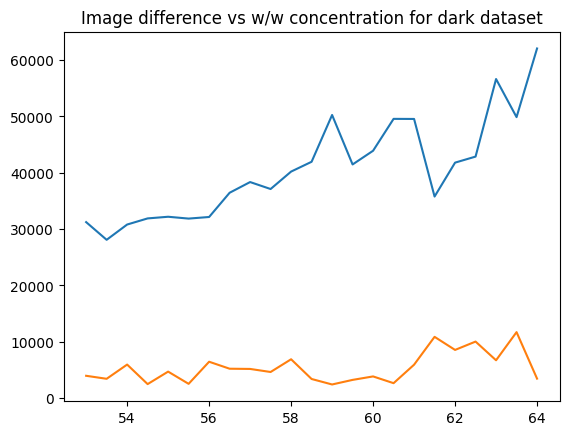

In [63]:
mean_conc_list = [np.mean(elem) for elem in conc_dist_list]
std_conc_list = [np.std(elem) for elem in conc_dist_list]
plt.plot(conc_list, mean_conc_list)
plt.plot(conc_list, std_conc_list)
plt.title("Image difference vs w/w concentration for dark dataset")

In [64]:
reference_directory = 'Reference'
reference_fname = 'Light'

ref_img = load_img_to_array(reference_directory, reference_fname)
#ref_array = ref_img[1600:2420, 2342:2882]
ref_array = ref_img[1700:2200, 2410:2820]

conc_dist_list = []
dir_list = ['Data_53','Data_53.5','Data_54','Data_54.5','Data_55','Data_55.5','Data_56',
            'Data_56.5','Data_57','Data_57.5','Data_58','Data_58.5', 'Data_59','Data_59.5',
            'Data_60','Data_60.5','Data_61','Data_61.5','Data_62','Data_62.5','Data_63','Data_63.5','Data_64']

for directory in dir_list:
    dist_list = []
    for i in range(5):
        fname = 'light' + str(i+1)

        target_img = load_img_to_array(directory, fname)
        #target_array = target_img[1600:2420, 2342:2882]
        target_array = target_img[1700:2200, 2410:2820]

        diff_val = dist_img_array(target_array, ref_array)
        dist_list.append(diff_val)
    conc_dist_list.append(dist_list)

Text(0.5, 1.0, 'Image difference vs w/w concentration for light dataset')

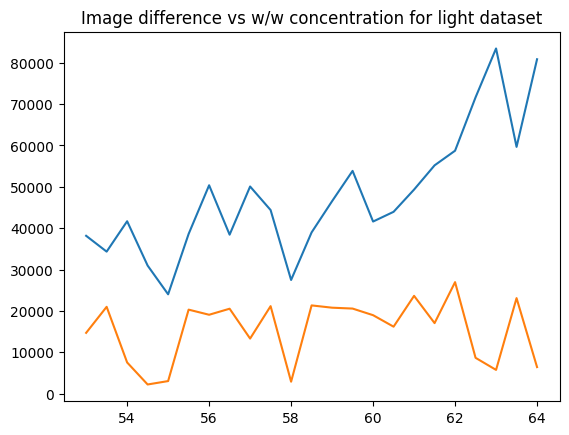

In [65]:
mean_conc_list = [np.mean(elem) for elem in conc_dist_list]
std_conc_list = [np.std(elem) for elem in conc_dist_list]
plt.plot(conc_list, mean_conc_list)
plt.plot(conc_list, std_conc_list)
plt.title("Image difference vs w/w concentration for light dataset")

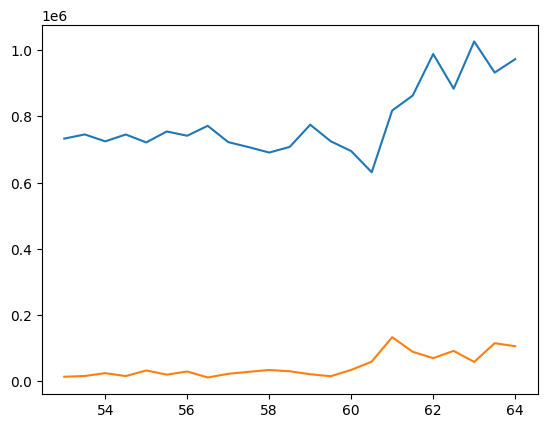

In [46]:
mean_conc_list = [np.mean(elem) for elem in conc_dist_list]
std_conc_list = [np.std(elem) for elem in conc_dist_list]
plt.plot(conc_list, mean_conc_list)
plt.plot(conc_list, std_conc_list)

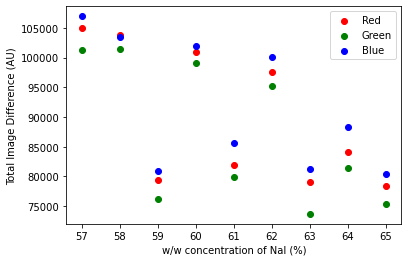

In [15]:
concentration = [57, 58, 59, 60, 61, 62, 63, 64, 65]
# print(npnorm_r_list[:len(concentration)])

# plotting the Image distortion vs. concentration graph
plt.scatter(concentration,npnorm_r_list[:len(concentration)], label='Red', color = 'red')
plt.scatter(concentration,npnorm_g_list[:len(concentration)], label='Green', color = 'green')
plt.scatter(concentration,npnorm_b_list[:len(concentration)], label='Blue', color = 'blue')
plt.xlabel(r'w/w concentration of NaI (%)')
plt.ylabel(r'Total Image Difference (AU)')

plt.legend()

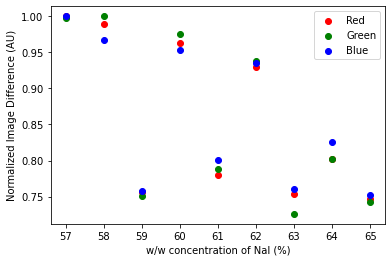

In [16]:
concentration = [57, 58, 59, 60, 61, 62, 63, 64, 65] 

# Calculating the normalized distortion by dividing each element present in the list by the largest element present
norm_r = npnorm_r_list[:len(concentration)]/max(npnorm_r_list)
norm_g = npnorm_g_list[:len(concentration)]/max(npnorm_g_list)
norm_b = npnorm_b_list[:len(concentration)]/max(npnorm_b_list)

# print(norm_r)
# print(norm_g)
# print(norm_b)

# plotting the Normalized Image distortion vs. concentration graph
plt.scatter(concentration,norm_r, label='Red', color = 'red')
plt.scatter(concentration,norm_g, label='Green', color = 'green')
plt.scatter(concentration,norm_b, label='Blue', color = 'blue')
plt.xlabel(r'w/w concentration of NaI (%)')
plt.ylabel(r'Normalized Image Difference (AU)')

plt.legend()